# Part 1: Introduction

The description of this dataset can be [found on Kaggle](https://www.kaggle.com/datasets/williecosta/economic-guide-to-college-majors?select=college_majors.csv). We'll start by getting the data into a dataframe and exploring it. Then, we'll go through a brief discussion based on the results of said exploration. Afterwards, we'll visualize the data and I'll write the rest of this after I finish analyzing the data...

## 1.1 Creating a DataFrame

In [1]:
# getting the data into a dataframe
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

od.download('https://www.kaggle.com/datasets/williecosta/economic-guide-to-college-majors?select=college_majors.csv')

csv: str = './economic-guide-to-college-majors/college_majors.csv' # a string containing a relative link to the data
data: pd.DataFrame = pd.read_csv(csv)

Skipping, found downloaded files in "./economic-guide-to-college-majors" (use force=True to force download)


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.1206,36,1976,...,270,1207,37,0.0184,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.1019,7,640,...,170,388,85,0.1172,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.1530,3,648,...,133,340,16,0.0241,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.1073,16,758,...,150,692,40,0.0501,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.3416,289,25694,...,5180,16697,1672,0.0611,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.1450,17,1857,...,264,1449,400,0.1772,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.4414,51,2912,...,296,2482,308,0.0957,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.5357,10,1526,...,553,827,33,0.0212,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.1196,1029,76442,...,13101,54639,4650,0.0573,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.1965,631,61928,...,12695,41413,3895,0.0592,60000,45000,72000,45829,10874,3170


## 1.2 Viewing the data

In [ ]:
data.head(n = 10)

## TODO: 

### In Section 2:

#### Notes:

Okay, so there's *a lot* of data here. Let's get back into the exploration and see if we can find:

#### TODO:

- Change column names to lowercase
- Maybe abbreviate some of the Major titles for plotting purposes

- The number of NAs, if any.
- The average number of students in a "college."

- The top 10 majors overall
- The top 10 majors for men
- The top 10 majors for women

- The bottom 10 majors overall
- The bottom 10 majors for men
- The bottom 10 majors for women

### Evergreen:

#### Notes:

The dataset has a lot of great information, so we should use it! Let's try to find:

- Which "college" has the most men
- Which "college" has the most women
- Which "college" has the most students overall

- The percentage of female graduates from each "college"
- The percentage of female graduates from the top 10 majors
- The percentage of female graduates from the bottom 10 majors

- The number of employed graduates from the top 10 majors
- The number of employed graduates from the bottom 10 majors

- Potentially pulling in additional data to see what demand for jobs related to those majors are, for context.


# Part 2: Exporation

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [2]:
data.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068190,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231203,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030329,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336050,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050300,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534000,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.068000,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703275,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087600,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.969000,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177200,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [8]:
# total_comp is short for the total number of students in the major compared to the number of men, then women in the major
total_comp: pd.DataFrame  = data[['Major','Total', 'Men', 'Women']]
total_comp.head(n = 15)

,Major,Total,Men,Women
0,PETROLEUM ENGINEERING,2339.0,2057.0,282.0
1,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0
2,METALLURGICAL ENGINEERING,856.0,725.0,131.0
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0
4,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0
5,NUCLEAR ENGINEERING,2573.0,2200.0,373.0
6,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0
7,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0
8,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0
9,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0


<AxesSubplot:ylabel='Major'>

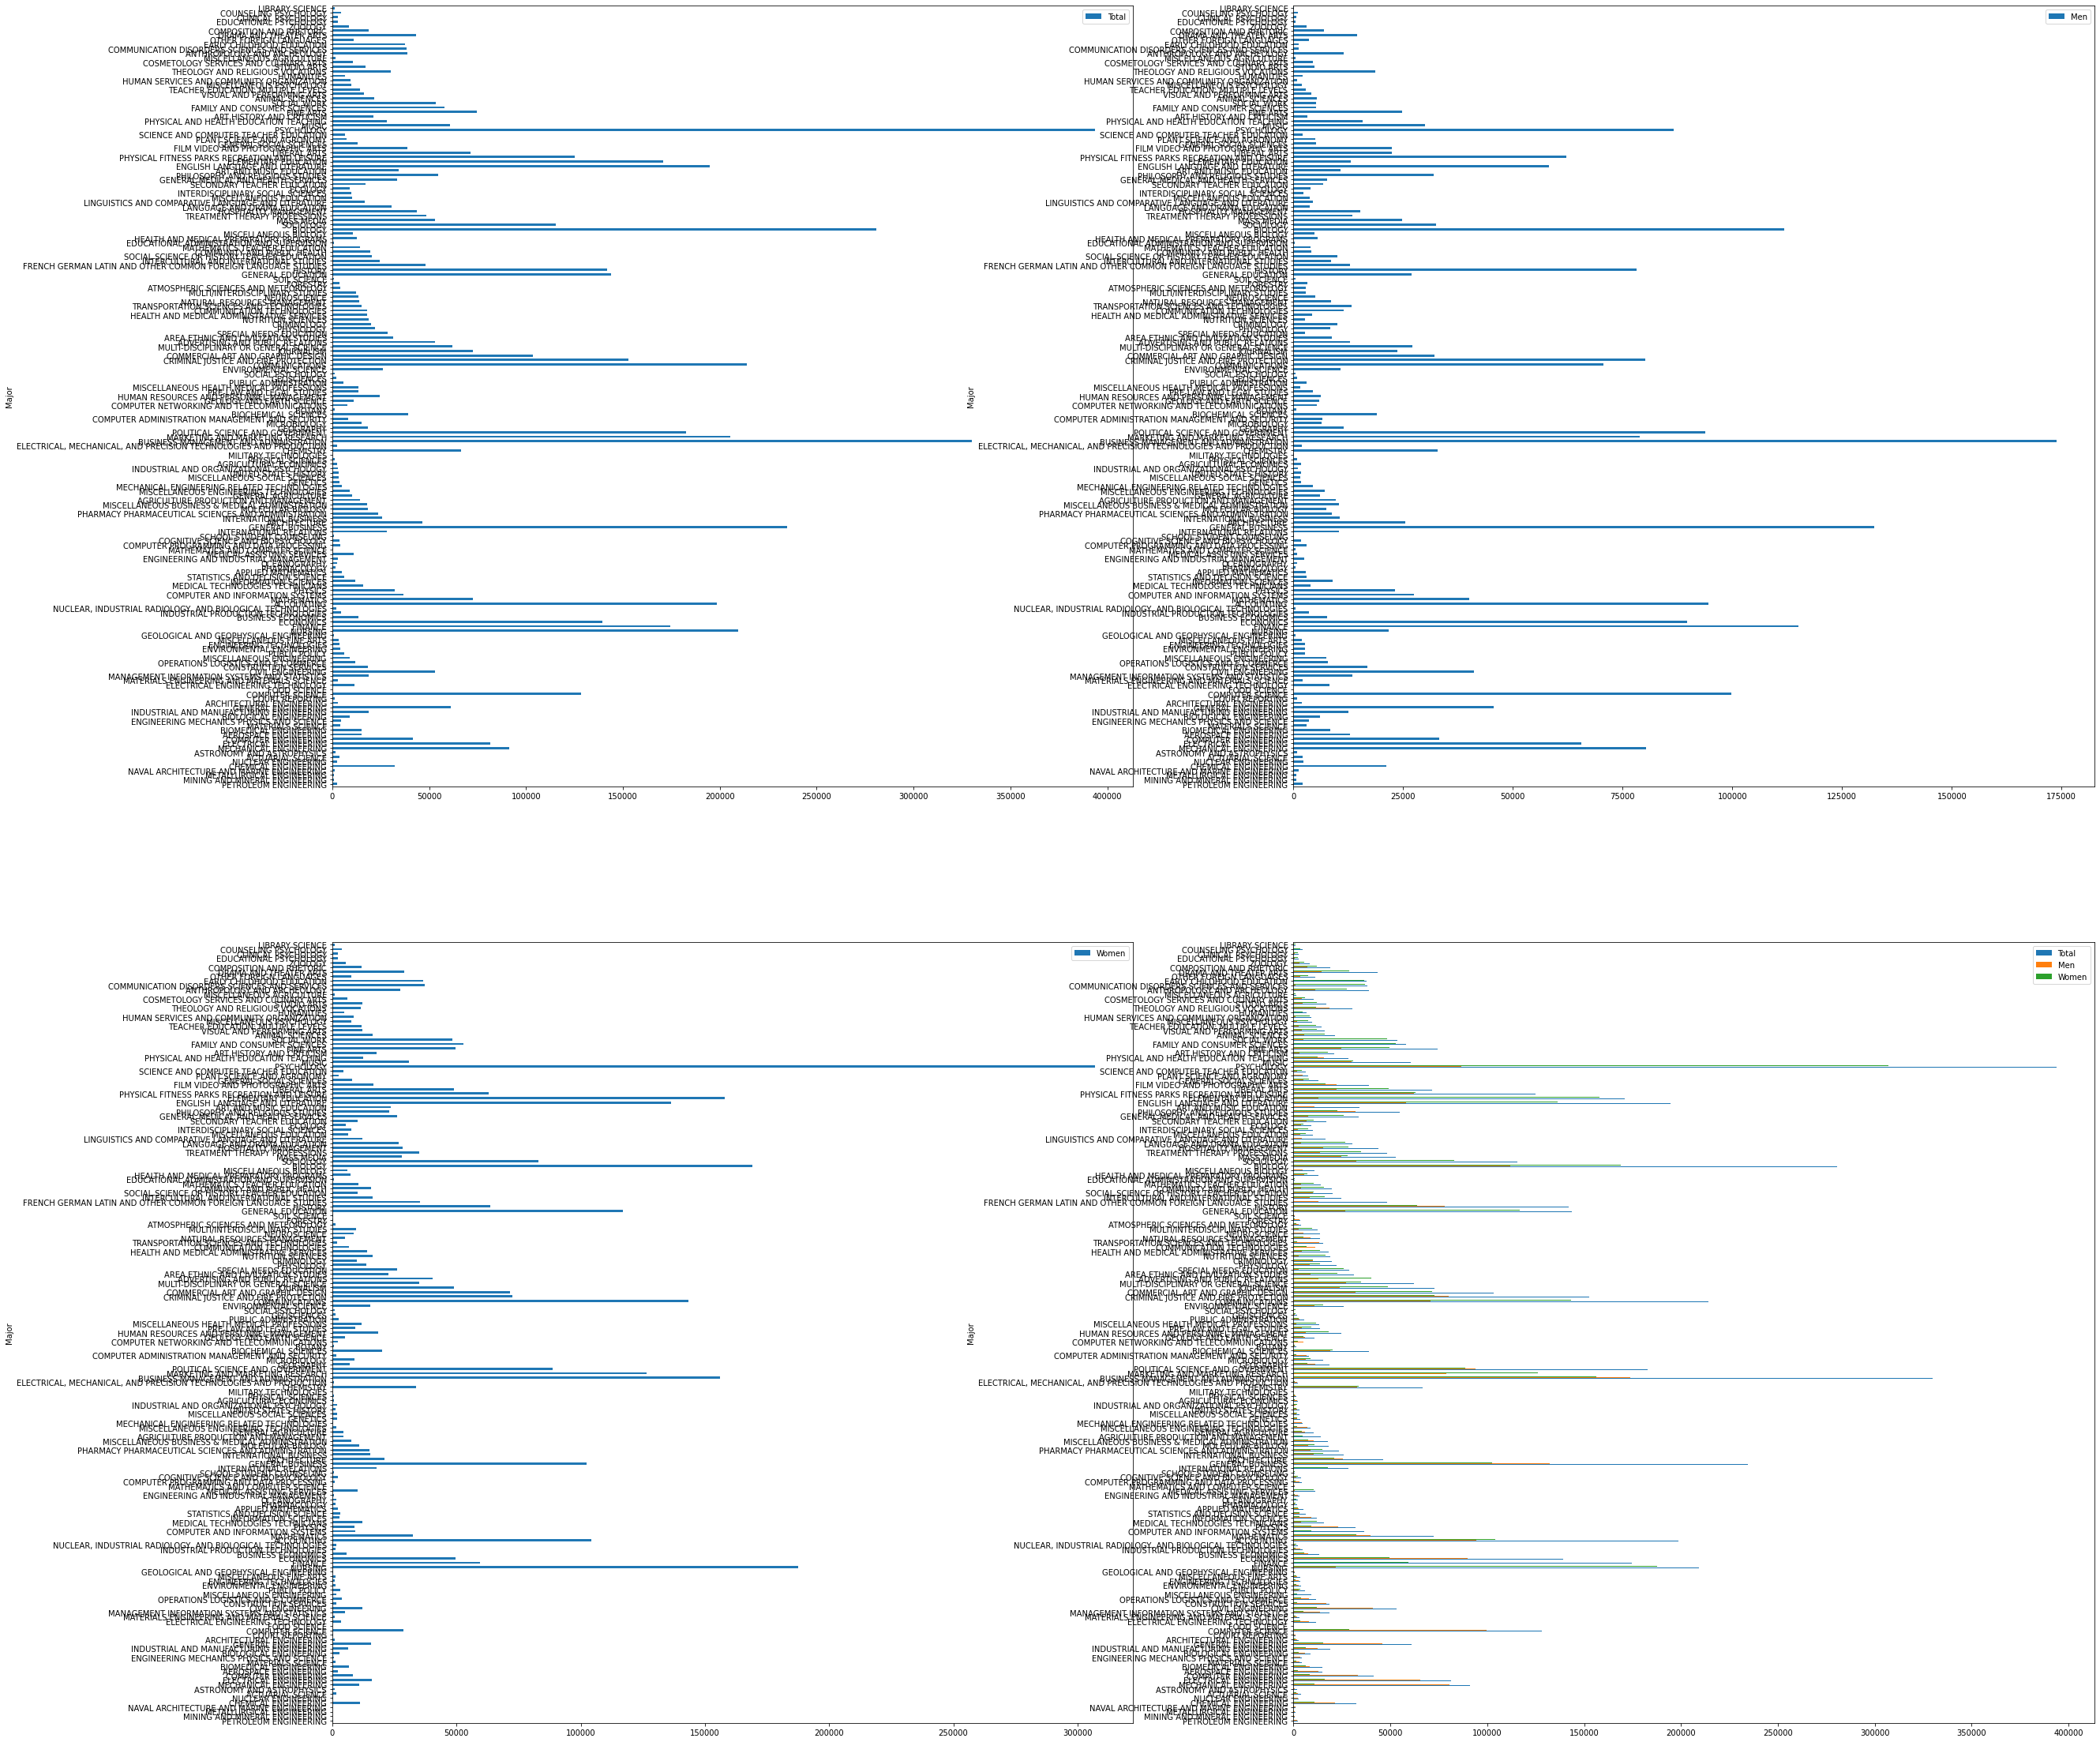

In [40]:
fig, ax = plt.subplots(2, 2) # What type should this return?

fig.set_figheight(40)
fig.set_figwidth(40)

total_majors = total_comp[['Major', 'Total']]
total_men = total_comp[['Major', 'Men']]
total_women = total_comp[['Major', 'Women']]

total_majors.plot(x = 'Major', kind = 'barh', ax = ax[0, 0])
total_men.plot(x = 'Major', kind = 'barh', ax = ax[0, 1])
total_women.plot(x = 'Major', kind = 'barh', ax = ax[1, 0])
total_comp.plot(x = 'Major', kind = 'barh', ax = ax[1, 1])